Importing Required modules

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


Data Preprocessing

In [ ]:
df.isnull().sum()

,0
year,0
per capita income (US$),0


In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Assuming 'df' is your DataFrame and it contains the columns 'year' and 'per capita income (US$)'
# First, clean the data by ensuring both columns are numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['per capita income (US$)'] = pd.to_numeric(df['per capita income (US$)'], errors='coerce')

# Drop rows with missing values in the relevant columns
df = df.dropna(subset=['year', 'per capita income (US$)'])

# Create the linear regression model
li = linear_model.LinearRegression()

# Fit the model (using 'year' as the predictor and 'per capita income (US$)' as the target)
li.fit(df[['year']], df['per capita income (US$)'])

# Now you can use the model to make predictions or examine the coefficients
print(f"Model Coefficients: {li.coef_}")
print(f"Model Intercept: {li.intercept_}")
y_pred = li.predict(df[['year']])
r_squared = r2_score(df['per capita income (US$)'], y_pred)
print(f"R-squared (accuracy): {r_squared}")
# Example: Make a prediction for a specific year
predicted_income = li.predict([[2017]])  # Predict for the year 2025
print(f"Predicted income for 2025: {predicted_income[0]}")


Model Coefficients: [828.46507522]
Model Intercept: -1632210.7578554575
R-squared (accuracy): 0.890916917957032
Predicted income for 2025: 38803.29886874952


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


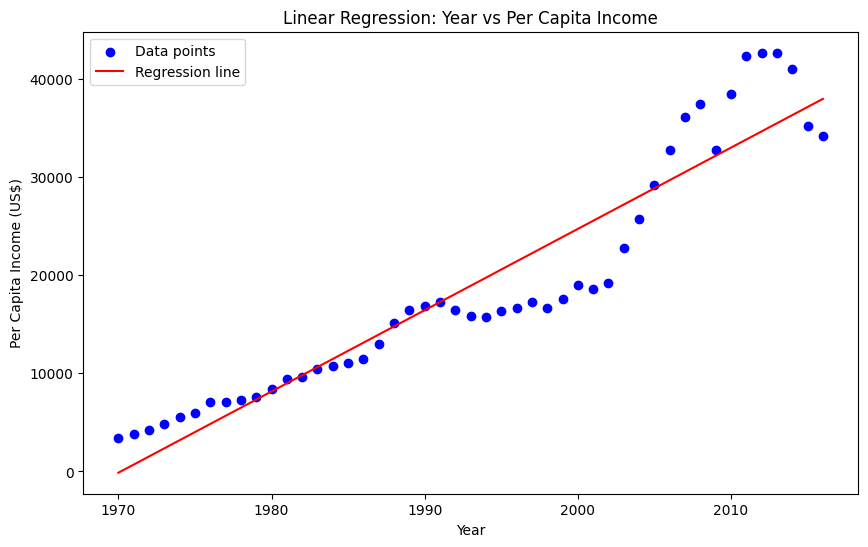

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['year'], df['per capita income (US$)'], color='blue', label='Data points')  # Scatter plot for data points
plt.plot(df['year'], y_pred, color='red', label='Regression line')  # Plot the regression line

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Linear Regression: Year vs Per Capita Income')
plt.legend()

# Show the plot
plt.show()